In [3]:
'''
%%capture
!pip install gdown

%%capture
!gdown https://drive.google.com/uc?id=19VIk1U5pXUQlOAwFyQAgUMQoP43HlGyi

%%capture
!unzip /notebooks/PlantVillageDataset.zip

!zip -rf filename.zip foldernames
'''
!pip install basic_image_eda

In [4]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import traceback
import sys

from basic_image_eda import BasicImageEDA


import pickle
import keras
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential

from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
'''
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
'''
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

from keras_preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


'''
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
'''

'\nfrom sklearn.preprocessing import LabelBinarizer\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Flatten\nfrom tensorflow.keras.layers import BatchNormalization\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.convolutional import MaxPooling2D\nfrom keras.layers.core import Activation, Flatten, Dropout, Dense\nfrom keras import backend as K\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.optimizers import Adam\nfrom keras.preprocessing import image\nfrom tensorflow.keras.utils import img_to_array\nfrom sklearn.preprocessing import MultiLabelBinarizer\nfrom sklearn.model_selection import train_test_split\n'

In [5]:
data_dir = r"/notebooks/plantvillage dataset/color/"

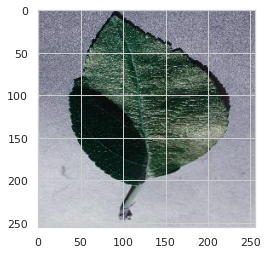

In [7]:
img = cv2.imread(data_dir+"Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG")
plt.imshow(img)

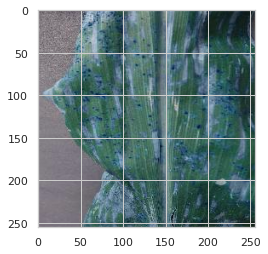

In [8]:
img = cv2.imread(data_dir+"Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/0a403456-5c5e-4aad-aa89-a118175c6ddd___RS_GLSp 4501.JPG")
plt.imshow(img)

In [9]:
BasicImageEDA.explore(data_dir)


found 1502 images.
Using 8 threads. (max:8)



100%|██████████| 1502/1502 [00:01<00:00, 841.67it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  1502

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['jpeg', 'jpg', 'png']

min height                               |  256
max height                               |  256
mean height                              |  256.0
median height                            |  256

min width                                |  256
max width                                |  256
mean width                               |  256.0
median width                             |  256

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256

{'dtype': 'uint8',
 'channels': [3, 4],
 'extensions': ['jpeg', 'jpg', 'png'],
 'min_h': 256,
 'max_h': 256,
 'mean_h': 256.0,
 'median_h': 256,
 'min_w': 256,
 'max_w': 256,
 'mean_w': 256.0,
 'median_w': 256,
 'mean_hw_ratio': 1.0,
 'median_hw_ratio': 1.0,
 'rec_hw_size_8': array([256, 256]),
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'mean': array([0.4598714 , 0.57038635, 0.4256736 ], dtype=float32),
 'std': array([0.21605805, 0.22352985, 0.22219999], dtype=float32)}

In [10]:
category_count = []

for root, dirs, files in os.walk(data_dir):
    for dir_path in dirs:
        category_count.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

In [11]:
count_df = pd.DataFrame(category_count, columns=['Category', 'Count'])
count_df.head(10)

,Category,Count
0,Corn_(maize)___Northern_Leaf_Blight,985
1,Cherry_(including_sour)___Powdery_mildew,1052
2,"Pepper,_bell___healthy",1478
3,Potato___healthy,152
4,Grape___Black_rot,1180
5,Apple___Apple_scab,630
6,Tomato___Spider_mites Two-spotted_spider_mite,1676
7,Tomato___Late_blight,1909
8,Strawberry___Leaf_scorch,1109
9,Apple___Cedar_apple_rust,275


In [12]:
total_images = count_df['Count'].sum()
total_images

54305

In [13]:
len(count_df)

38

[]

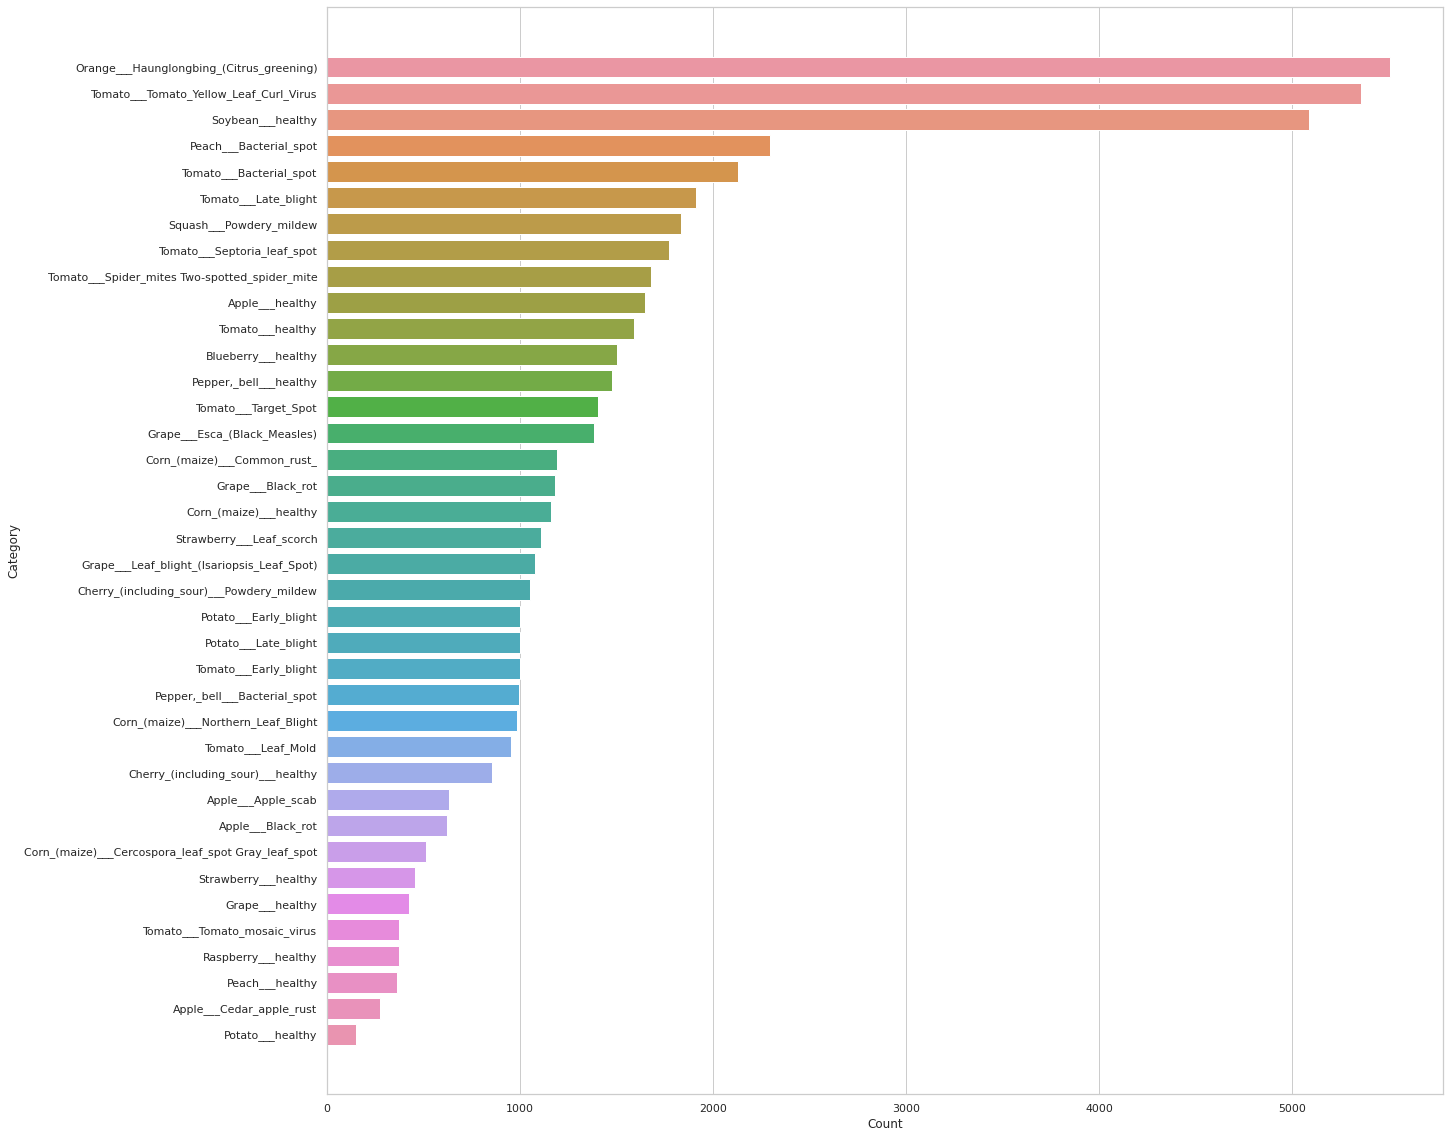

In [14]:
count_df = count_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(20,20))
sns.barplot(x="Count", y="Category", data=count_df)
plt.plot()

In [15]:
healthy_images_count = count_df[count_df['Category'].str.endswith("healthy")]['Count'].sum()
healthy_images_count

15084

In [16]:
disease_images_count = total_images - healthy_images_count
disease_images_count

39221

[]

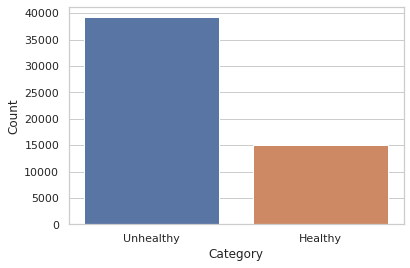

In [17]:
temp_df = pd.DataFrame(data=[("Unhealthy", disease_images_count), ("Healthy", healthy_images_count)], columns=['Category', 'Count'])
sns.barplot(y="Count",x="Category", data=temp_df)
plt.plot()

In [18]:
healthy_cat = len(count_df[count_df['Category'].str.endswith('healthy')])
print("healthy_cat",healthy_cat)
print("unhealthy_cat",38 - healthy_cat)

healthy_cat 12
unhealthy_cat 26


In [22]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = "/notebooks/plantvillage dataset/"
width=256
height=256
depth=3

In [20]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [21]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    
    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Corn_(maize)___Common_rust_ ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processi

In [23]:
image_size = len(image_list)
image_size

7552

In [24]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [25]:
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [26]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [27]:
'''
len(np_image_list)*0.2 // BS
'''

'\nlen(np_image_list)*0.2 // BS\n'

In [28]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
#x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [29]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [30]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [32]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / 25)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [33]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=25, verbose=1
    )

Epoch 1/25
188/188 [==============================] - 96s 469ms/step - loss: 0.3079 - accuracy: 0.1965 - val_loss: 1.3905 - val_accuracy: 0.0285
Epoch 2/25
188/188 [==============================] - 84s 448ms/step - loss: 0.0714 - accuracy: 0.5187 - val_loss: 1.0053 - val_accuracy: 0.1032
Epoch 3/25
188/188 [==============================] - 81s 430ms/step - loss: 0.0598 - accuracy: 0.6033 - val_loss: 0.1085 - val_accuracy: 0.3269
Epoch 4/25
188/188 [==============================] - 83s 439ms/step - loss: 0.0555 - accuracy: 0.6389 - val_loss: 0.0664 - val_accuracy: 0.6089
Epoch 5/25
188/188 [==============================] - 82s 437ms/step - loss: 0.0510 - accuracy: 0.6815 - val_loss: 0.2261 - val_accuracy: 0.2455
Epoch 6/25
188/188 [==============================] - 86s 457ms/step - loss: 0.0440 - accuracy: 0.7279 - val_loss: 0.1204 - val_accuracy: 0.3839
Epoch 7/25
188/188 [==============================] - 82s 434ms/step - loss: 0.0404 - accuracy: 0.7587 - val_loss: 0.1018 - val_ac

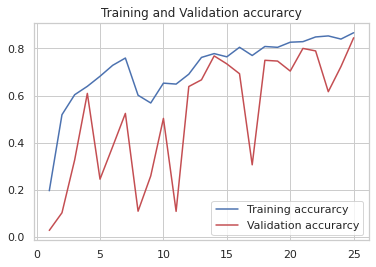

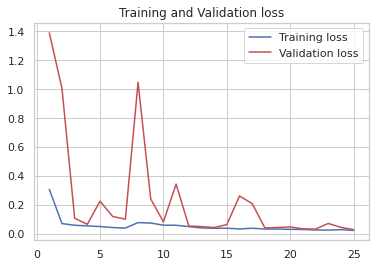

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [35]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
48/48 [==============================] - 2s 47ms/step - loss: 0.0298 - accuracy: 0.8445
Test Accuracy: 84.44738388061523


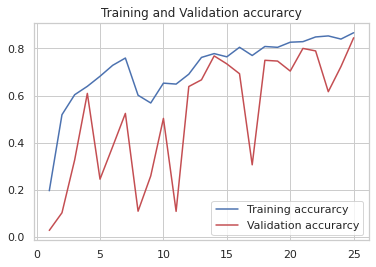

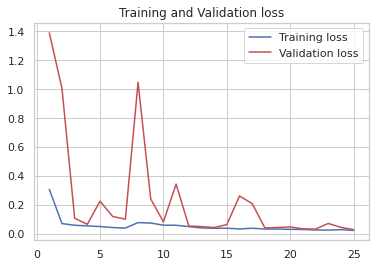

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [37]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
48/48 [==============================] - 2s 45ms/step - loss: 0.0298 - accuracy: 0.8445
Test Accuracy: 84.44738388061523
